In [2]:
from scipy import stats
from tabulate import tabulate

In [3]:
"""
H0 : mu <= 12 vs H1 : mu > 12
n = 40, xbar = 13.25 sigma = 3.2, alpha = 0.05

if z_value > 1.645 reject H0
==> xbar <= 12.8323 to accept H0
"""

def z_value(mu) :
    return (12 + (stats.norm.ppf(0.05)*(3.2/pow(40, 0.5))) - mu)/(3.2/pow(40, 0.5))

def type2_from_z_value(z_value) :
    if z_value > 0 :
        return 1 - stats.norm.cdf(z_value)
    return stats.norm.cdf(z_value)

mu_list = [14, 13.6, 13.2, 12.8323, 12.8, 12.4, 12.0001, 12, 11.99, 11.01, 10.5, 9.2]
data = []
for mu in mu_list :
    beta = type2_from_z_value(z_value(mu))
    data.append([mu, round(z_value(mu), 2), round(beta, 4), round(1 - beta, 5)])


print(tabulate(data, headers=['mu', 'z value', 'beta', '1 - beta'], tablefmt='orgtbl'))

|      mu |   z value |   beta |   1 - beta |
|---------+-----------+--------+------------|
| 14      |     -5.6  | 0      |    1       |
| 13.6    |     -4.81 | 0      |    1       |
| 13.2    |     -4.02 | 0      |    0.99997 |
| 12.8323 |     -3.29 | 0.0005 |    0.9995  |
| 12.8    |     -3.23 | 0.0006 |    0.99937 |
| 12.4    |     -2.44 | 0.0074 |    0.99256 |
| 12.0001 |     -1.65 | 0.05   |    0.95002 |
| 12      |     -1.64 | 0.05   |    0.95    |
| 11.99   |     -1.63 | 0.0521 |    0.94793 |
| 11.01   |      0.31 | 0.3776 |    0.62241 |
| 10.5    |      1.32 | 0.0935 |    0.90655 |
|  9.2    |      3.89 | 0.0001 |    0.99995 |


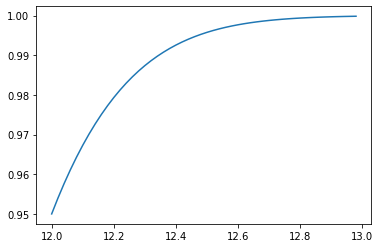

In [4]:
import matplotlib.pyplot as plt

x = [12+(i*0.02) for i in range(50)]
y = [1 - type2_from_z_value(z_value(12+(i*0.02))) for i in range(50)]
plt.plot(x, y);

In [5]:
1 - stats.norm.cdf(2.52)

0.005867741715332553